# Problema de Negócio:

📝Quais gêneros de animes tendem a receber notas mais altas?

# Importando Libs

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Carregando Dataset

In [235]:
anime = pd.read_csv("animes.csv")


# Analisando os Dados

In [236]:
anime.shape

(15262, 27)

In [237]:
anime.head()

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True


In [238]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int64  
 16  Members          15262 non-null  int64  
 17  Favorites   

🔎Dectando Valores Duplicados

In [239]:
# Verificar se há linhas duplicadas
anime.duplicated().sum()

3

🔎Dectando Valores Ausentes

In [240]:
valAusentes = anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Premiered          9735
English Name       8422
Japanese            215
Studios               9
Popularity            0
Demographics          0
Themes                0
Not Recommended       0
Mixed Feelings        0
Recommended           0
Name                  0
description           0
Favorites             0
Members               0
Score                 0
Ranked                0
Type                  0
Rating                0
Duration              0
Genres                0
Source                0
Licensors             0
Producers             0
Aired                 0
Status                0
Episodes              0
Seasonal              0
dtype: int64


In [241]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valAusentes[valAusentes > 0] / anime.shape[0] 

print(f'{valores_ausentes_percent * 100} %')

Premiered       63.785873
English Name    55.182807
Japanese         1.408728
Studios          0.058970
dtype: float64 %


> 📄Vamos criar um DataFrame novo e deixar apenas as colunas que precisamos

In [242]:
df_anime = anime[['Score', 'Name', 'Genres']]

df_anime.sample(10)

,Score,Name,Genres
8297,6.231,Kikou Keisatsu Metal Jack,"['Action', 'Sci-Fi']"
1914,7.481,Little Busters!,"['Comedy', 'Drama', 'Supernatural']"
10890,5.691,Stitch!: Zutto Saikou no Tomodachi Special,"['Adventure', 'Comedy']"
927,7.821,Shingeki no Kyojin: Lost Girls,"['Action', 'Drama']"
8669,6.151,Benghuai Xinghe,"['Action', 'Adventure', 'Sci-Fi']"
2975,7.251,"Ijiranaide, Nagatoro-san",['Comedy']
490,8.101,Akatsuki no Yona OVA,"['Action', 'Adventure', 'Fantasy']"
4597,6.911,Vanitas no Karte: En Route Pour le Gévaudan,"['Action', 'Fantasy', 'Mystery']"
12768,4.911,Sekai ga Horobiru Mae ni Kimi ni Aitai,"['Drama', 'Romance', 'Sci-Fi']"
6930,6.471,Shukufuku no Campanella: La Campanella Della B...,"['Comedy', 'Fantasy', 'Ecchi']"


🔎Verificando se tem valores nulos no novo DataFrame

In [243]:
valAusentes = df_anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Score     0
Name      0
Genres    0
dtype: int64


🔎Verificando se tem valores duplicados novo DataFrame

In [244]:
# Verificar se há linhas duplicadas
df_anime.duplicated().sum()

3

In [245]:
df_anime[df_anime.duplicated()]

,Score,Name,Genres
6860,6.491,Garouden: The Way of the Lone Wolf,['Action']
10450,5.801,Z/X: Code Reunion,"['Fantasy', 'Sci-Fi']"
10451,5.801,Zegapain ADP,"['Action', 'Romance', 'Sci-Fi']"


# Limpeza e Tratamento dos Dados

> 📄Como encontramos valores duplicados, precisamos trata-los

In [246]:
df_anime.shape

(15262, 3)

In [247]:
#Removendo as duplicatas
df_anime = df_anime.drop_duplicates()

In [248]:
#Verificando se as duplicatas foram removidas
df_anime.duplicated().sum()

0

In [249]:
df_anime.shape

(15259, 3)

# Análise dos Dados

In [250]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15259 entries, 0 to 15261
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   15259 non-null  float64
 1   Name    15259 non-null  object 
 2   Genres  15259 non-null  object 
dtypes: float64(1), object(2)
memory usage: 476.8+ KB


In [251]:
# Estatísticas descritivas
df_anime.describe()

,Score
count,15259.000000
mean,5.683925
std,2.335074
min,0.000000
25%,5.541000
50%,6.351000
75%,7.081000
max,9.361000


In [252]:
# Remover colchetes e aspas da coluna "Genres"
df_anime['Genres'] = df_anime['Genres'].str.replace(r"[\[\]']", '', regex=True)

# Separar os gêneros e criar dummies
df_anime_expanded = df_anime['Genres'].str.get_dummies(sep=', ')

# Concatenar com o DataFrame original
df_anime_expanded = pd.concat([df_anime, df_anime_expanded], axis=1)

# Calcular a mediana das notas por gênero
median_generos = {}

for genero in df_anime_expanded.columns[3:]:  # Gêneros começam a partir da terceira coluna
    # Filtra apenas os animes que pertencem a esse gênero
    median_generos[genero] = df_anime_expanded.loc[df_anime_expanded[genero] == 1, 'Score'].median()

# Ordenar as medianas por valor decrescente
median_generos = pd.Series(median_generos).sort_values(ascending=False)

# Exibir as medianas
print(median_generos)


AwardWinning     7.456
Suspense         7.211
Mystery          7.081
Romance          6.901
Supernatural     6.821
Drama            6.821
GirlsLove        6.786
Gourmet          6.771
BoysLove         6.771
Action           6.721
Sports           6.661
Adventure        6.571
Ecchi            6.531
Sci-Fi           6.521
Fantasy          6.516
Comedy           6.461
SliceofLife      6.311
Horror           6.231
AvantGarde       5.021
Unknown-Genre    4.831
dtype: float64


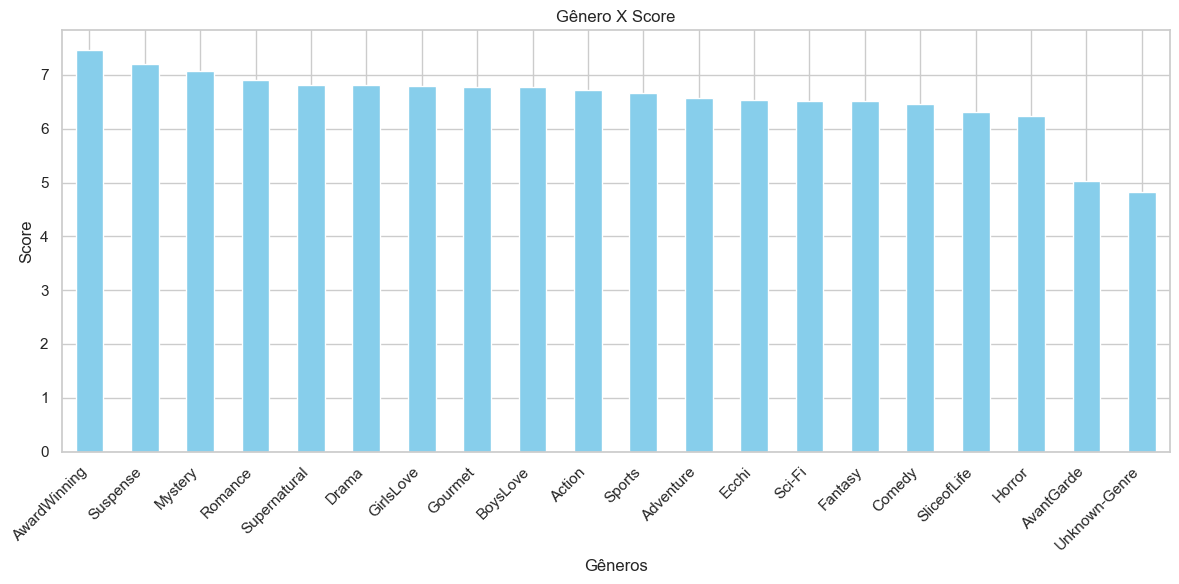

In [253]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))  # Tamanho da figura
median_generos.plot(kind='bar', color='skyblue')  # Tipo de gráfico e cor
plt.title('Gênero X Score')  # Título do gráfico
plt.xlabel('Gêneros')  # Rótulo do eixo X
plt.ylabel('Score')  # Rótulo do eixo Y
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos do eixo X
plt.tight_layout()  # Ajuste automático do layout
plt.show()  # Exibir o gráfico

# Conclusão 

Com o gráfico podemos concluir que animes premiados, suspense e Mistérios são os mais populares